# Assignment 4

## Number 1: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
import random
import matplotlib.pyplot as plt

 

In [2]:
df1 = pd.read_csv('as4_1.txt', sep="\t", header=None, encoding='utf-8')

df1.columns = ["a","b","c"]

X1 = df1.iloc[:, :2].to_numpy()

In [3]:
def euclidean2D(p1, p2):
    xx1 = p1[0]
    xx2 = p2[0]
    yy1 = p1[1]
    yy2 = p2[1]
    
    return np.sqrt((xx1-xx2)**2 + (yy1-yy2)**2)

In [4]:
def getNearestCentroid (cen, val):
    distances = []
    for i in cen:
        dist = euclidean2D (i, val)
        distances.append (dist)
    index = distances.index(min (distances))
    return cen [index]

In [5]:
def myInit (k):
    centroids = [random.choice(X1)]; indexes = []
    for i in range (k-1):
        distances = []
        for (i, value) in enumerate(X1):
            dist = euclidean2D(getNearestCentroid(centroids, value), value)
            distances.append (dist)
        index = distances.index (max(distances))
        centroids.append (X1[index])
        indexes.append (index)
    return centroids

In [6]:
def myAssign(cen):
    nearestCentroidIndex = []
    for value in X1:
        distances = []
        for c in cen:
            dist = euclidean2D(value, c)
            distances.append (dist)
        index = distances.index (min(distances))
        nearestCentroidIndex.append(index)
    return nearestCentroidIndex

In [7]:
def myCentroid(cen, nearestCentroid):
    clusters = [[]for _ in range(len(cen))]
    for(i,v) in enumerate(nearestCentroid):
        clusters[v].append(X1[i])
    return clusters

In [8]:
def myUpdateCentroid(clust):
    newCen = []
    for points in clust:
        x = [p[0] for p in points]
        y = [p[1] for p in points]
        if len(points) == 0: cen = (0, 0)
        else: cen = (sum(x) / len (points), sum(y) / len(points))
        newCen.append (cen)
    return newCen

In [12]:
def myPlot(clust, cen):
    colors = [
         'red', 'blue', 'green', 'yellow', 'pink', 'magenta',
         'purple', 'gray', 'brown', 'linen', 'limegreen'
    ]
    markers = ['o', '+', '<', '^']
    for (i, v) in enumerate(clust):
        value = np.array(v)
        plt.scatter(
             value[:, 0], value[:, 1],
             color=colors[(len (clust)+i)%len(colors)],
             marker=markers [(len(clust)+i)%len (markers)],
             label=f'K = {i+1}'
        )
    for i in cen:
        plt.scatter(
             i[0], i[1],
             color='black', marker='x'
        )
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

In [13]:
def myKmeanPlusPlus (k, myTol, myMax):
    cen = myInit (k)
    nearest = []; iterations = 0
    while iterations < myMax:
        newNearest = myAssign (cen)
        if nearest == newNearest: break
        else: nearest = newNearest
        clust = myCentroid (cen, nearest)
        cen = myUpdateCentroid (clust)
        iterations += 1
    myPlot(clust, cen)

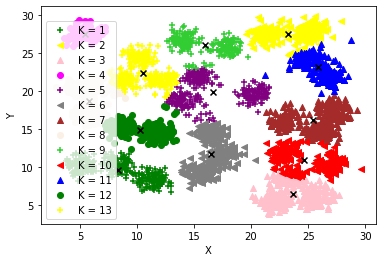

In [14]:
myKmeanPlusPlus(13,10,50)

## Number 2

In [15]:
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score


In [16]:
df2 = pd.read_csv('as4_2.csv', sep=",", header=None, encoding='utf-8')

df2.columns = ["d","e","f"]

data2 = np.column_stack([df2.d, df2.e])

X2 = data2
y2 = df2.f

print('Class labels:', np.unique(y2))

df2.head()

print(df2.head())

Class labels: [1 2 3 4 5 6]
       d      e  f
0  27.70  20.85  1
1  29.90  19.95  1
2  26.80  19.05  1
3  28.35  18.25  1
4  30.40  17.85  1


In [17]:
def getLabel(da):
    print ("True Labels: ")
    print(np.unique(y2))

In [18]:
getLabel(data2)

True Labels: 
[1 2 3 4 5 6]


In [19]:
def getData(da):
    print("Vectors: ")
    print(da)

In [20]:
d = getData(X2)

Vectors: 
[[27.7  20.85]
 [29.9  19.95]
 [26.8  19.05]
 [28.35 18.25]
 [30.4  17.85]
 [27.25 16.7 ]
 [29.05 16.  ]
 [27.15 14.85]
 [28.2  13.95]
 [30.35 13.85]
 [27.25 11.95]
 [29.45 12.05]
 [31.55 12.2 ]
 [33.05 10.65]
 [29.95  9.85]
 [28.    9.75]
 [27.15  7.85]
 [29.15  8.1 ]
 [31.95  8.6 ]
 [34.7   8.55]
 [34.8  12.25]
 [36.3  15.25]
 [36.6  13.2 ]
 [38.7  14.25]
 [40.3  15.5 ]
 [42.25 14.25]
 [40.7  12.8 ]
 [38.6  12.1 ]
 [36.1  10.5 ]
 [38.35 10.4 ]
 [37.65  8.4 ]
 [40.15  8.55]
 [40.8  10.65]
 [42.9  11.25]
 [41.95  8.5 ]
 [42.45 17.45]
 [40.25 18.45]
 [42.55 19.45]
 [40.95 20.65]
 [42.25 22.15]
 [38.85 22.4 ]
 [38.4  20.  ]
 [35.25 20.2 ]
 [33.25 21.  ]
 [34.15 22.35]
 [35.55 22.5 ]
 [36.55 21.4 ]
 [33.35 19.6 ]
 [32.85 19.55]
 [32.4  19.15]
 [32.45 18.7 ]
 [32.8  18.9 ]
 [33.2  19.2 ]
 [33.7  19.05]
 [33.4  18.75]
 [33.05 18.5 ]
 [32.8  18.2 ]
 [34.   18.7 ]
 [33.85 18.25]
 [33.35 18.15]
 [32.8  17.7 ]
 [33.15 17.55]
 [33.75 17.75]
 [34.15 17.85]
 [34.35 18.35]
 [34.95 18.5 ]


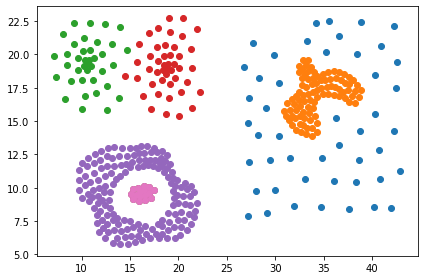

In [21]:
groups = df2.groupby("f")

for name, group in groups:
    plt.scatter(group.d, group.e, marker='o')

plt.scatter(group.d, group.e)


plt.tight_layout()
plt.show()

In [22]:
def getDBSCAN(X2, eps, min_samples):
    db = DBSCAN(eps, min_samples, metric='euclidean')
    model = db.fit(X2)
    return model.labels_

In [31]:
getDBSCAN(X2, 2, 2)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass min_samples=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([-1, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1,  0,  0, -1, -1, -1, -1, -1,  2, -1,  2, -1,  3, -1, -1,
        3, -1,  0,  4,  4,  4, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6

In [24]:
pred = getDBSCAN(X2, 2, 3)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass min_samples=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [25]:
def getAccuracy(pred, true):
    return(accuracy_score(true, pred))

In [26]:
getAccuracy(df2.f, pred)

0.10353535353535354

In [27]:
df2['f'] = pred

In [28]:
print(df2.head())

       d      e  f
0  27.70  20.85 -1
1  29.90  19.95 -1
2  26.80  19.05  0
3  28.35  18.25  0
4  30.40  17.85  0


In [29]:
def plotDBSCAN(df2):
    groups = df2.groupby("f")

    for name, group in groups:
        plt.scatter(group.d, group.e, marker='o')

    plt.scatter(group.d, group.e)


    plt.tight_layout()
    plt.show()
        

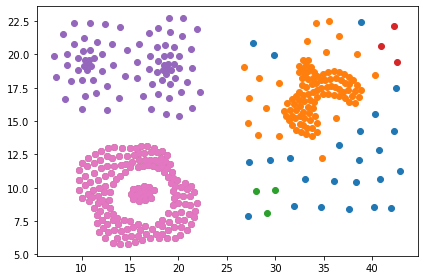

In [30]:
plotDBSCAN(df2)

## Number 3 